In [9]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("C:/Users/57662/Downloads/flight_delays.txt", sep=',')

In [10]:
df.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y


In [21]:
df.dep_delayed_15min[df.dep_delayed_15min == 'N'].count()

80956

In [22]:
df.dep_delayed_15min[df.dep_delayed_15min == 'Y'].count()

19044

([<matplotlib.patches.Wedge at 0x23735451dc0>,
 [Text(-0.9089330994142737, 0.6195487234989371, ''),
  Text(0.9089330994142736, -0.6195487234989372, 'Delayed')])

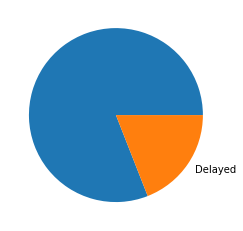

In [25]:
plt.pie([df.dep_delayed_15min[df.dep_delayed_15min == 'N'].count(),df.dep_delayed_15min[df.dep_delayed_15min == 'Y'].count()],
       labels = ['','Delayed'])

In [38]:
import numpy as np
bins = np.arange(df.Distance.min(),df.Distance.max()+1, 548)
bins, df.Distance.min(),df.Distance.max()

(array([  30,  578, 1126, 1674, 2222, 2770, 3318, 3866, 4414, 4962]), 30, 4962)

In [41]:
df['Distance_Bin']=pd.cut(df.Distance,bins)
df.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min,Distance_Bin
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N,"(578, 1126]"
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N,"(578, 1126]"
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N,"(30, 578]"
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N,"(578, 1126]"
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y,"(30, 578]"


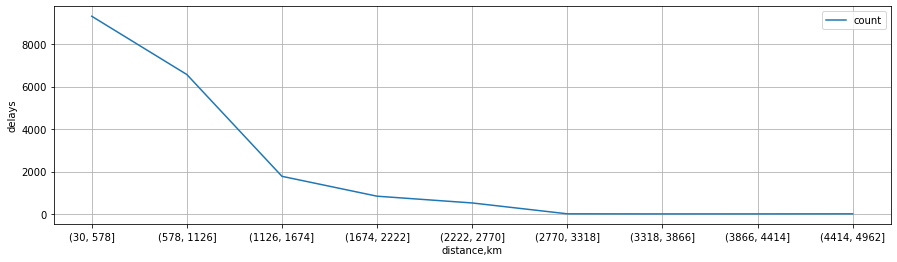

In [222]:
counted_delays = df[df.dep_delayed_15min == 'Y'].groupby('Distance_Bin').aggregate({'Distance':'count'}).rename(
    columns={'Distance':'count'})
counted_delays.plot(ylabel='delays',xlabel='distance,km',figsize=(15,4),grid=True,) 
plt.show()

In [120]:
top_5 = df[df.dep_delayed_15min == 'Y'].groupby('Dest').aggregate({'dep_delayed_15min':'count'}).sort_values(
    'dep_delayed_15min', axis=0, ascending=False).head()
top_5

,dep_delayed_15min
Dest,
ATL,1281
ORD,1072
DFW,656
EWR,584
LAX,525


<AxesSubplot:xlabel='Dest', ylabel='Delays'>

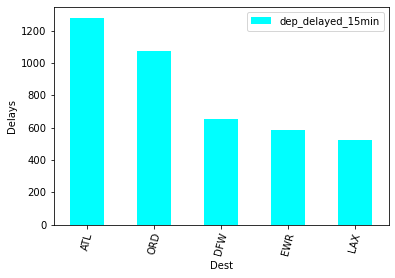

In [127]:
top_5.plot(kind='bar', rot=75, color='cyan',ylabel='Delays')

([<matplotlib.patches.Wedge at 0x23739b1eeb0>,
 [Text(0.7961788828956807, 0.7590119804265189, 'winter'),
  Text(-0.743487271105046, 0.8106951817451317, 'spring'),
  Text(-0.7845976725685071, -0.7709776210760478, 'summer'),
  Text(0.7859929670848701, -0.7695551024410939, 'autumn')])

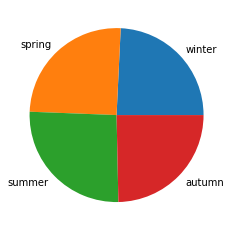

In [143]:
winter = df[(df.Month == 'c-12') | (df.Month == 'c-1') | (df.Month == 'c-2') & (df.dep_delayed_15min == 'Y')].dep_delayed_15min.count()
spring = df[(df.Month == 'c-3') | (df.Month == 'c-4') | (df.Month == 'c-5') & (df.dep_delayed_15min == 'Y')].dep_delayed_15min.count()
summer = df[(df.Month == 'c-6') | (df.Month == 'c-7') | (df.Month == 'c-8') & (df.dep_delayed_15min == 'Y')].dep_delayed_15min.count()
autumn = df[(df.Month == 'c-9') | (df.Month == 'c-10') | (df.Month == 'c-11') & (df.dep_delayed_15min == 'Y')].dep_delayed_15min.count()
delays_per_season = [winter,spring,summer,autumn]

plt.pie(delays_per_season,
       labels = ['winter','spring','summer','autumn'])


In [160]:
Carrier_flights = df.groupby('UniqueCarrier').aggregate({'dep_delayed_15min':'count'})
Carrier_flights.head()

,dep_delayed_15min
UniqueCarrier,
AA,9418
AQ,234
AS,2222
B6,1838
CO,4334


In [161]:
Carrier_delays = df[df.dep_delayed_15min == 'Y'].groupby('UniqueCarrier').aggregate({'dep_delayed_15min':'count'})
Carrier_delays.head()

,dep_delayed_15min
UniqueCarrier,
AA,1770
AQ,18
AS,541
B6,393
CO,788


<AxesSubplot:xlabel='UniqueCarrier', ylabel='Delay Probability'>

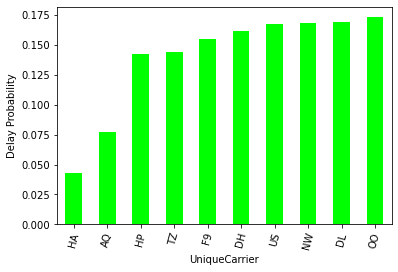

In [168]:
top10_carriers = (Carrier_delays / Carrier_flights).sort_values(
        'dep_delayed_15min', axis=0, ascending=True).head(10)
top10_carriers.plot(kind='bar', rot=75, color='lime',ylabel='Delay Probability',legend= False)

<AxesSubplot:xlabel='UniqueCarrier', ylabel='Delay Probability'>

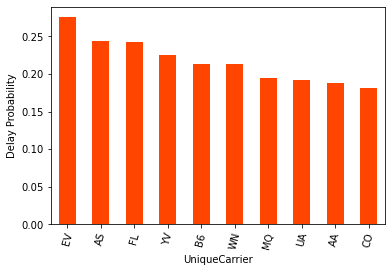

In [170]:
top10_worst_carriers = (Carrier_delays / Carrier_flights).sort_values(
        'dep_delayed_15min', axis=0, ascending=False).head(10)
top10_worst_carriers.plot(kind='bar', rot=75, color='orangered',ylabel='Delay Probability',legend= False)

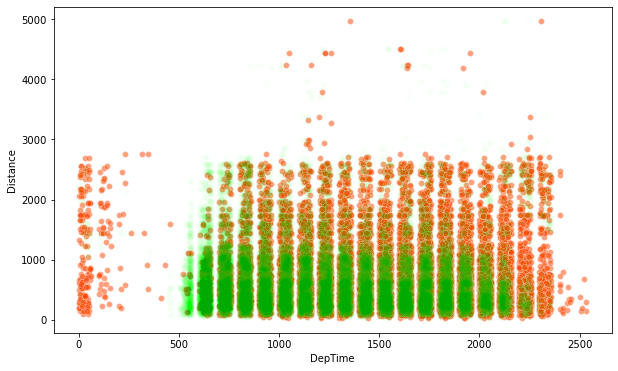

In [228]:
df_cut_Y = df[df.dep_delayed_15min == 'Y'].loc[:,['DepTime','Distance']]
df_cut_N = df[df.dep_delayed_15min == 'N'].loc[:,['DepTime','Distance']]
plt.figure(figsize=(10, 6))
sns.scatterplot(x='DepTime', y='Distance', data=df_cut_Y, color='orangered', alpha=0.5, linewidths=5);
sns.scatterplot(x='DepTime', y='Distance', data=df_cut_N, color='lime', alpha=0.01, linewidths=5);

#Что здесь случилось???


<AxesSubplot:xlabel='DepTime', ylabel='Distance'>

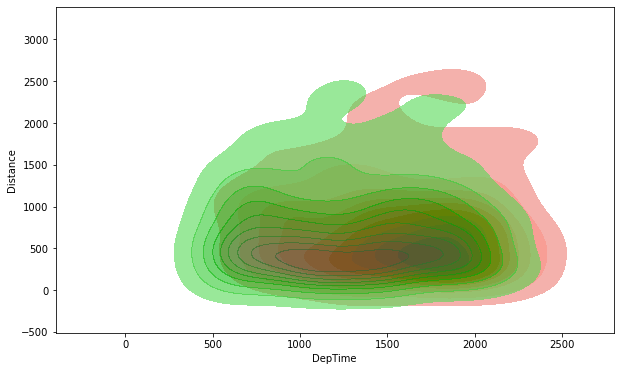

In [230]:
plt.figure(figsize=(10, 6))
sns.kdeplot(x=df_cut_Y.iloc[:500]['DepTime'], y=df_cut_Y.iloc[:500]["Distance"],color ='orangered',fill=True, legend = False)
sns.kdeplot(x=df_cut_N.iloc[:500]['DepTime'], y=df_cut_N.iloc[:500]["Distance"],color ='lime',fill=True, legend = False,alpha = 0.6)
